The lung cancer data used in this notebook
was published in :
          Hong, Z.Q. and Yang, J.Y. "Optimal Discriminant Plane for a Small
          Number of Samples and Design Method of Classifier on the Plane",
          Pattern Recognition, Vol. 24, No. 4, pp. 317-324, 1991.
        - Donor: Stefan Aeberhard, stefan _at_ coral.cs.jcu.edu.au
        - Date : May, 1992

    32 lines
    57 (1 class attribute, 56 predictive)
    attribute 1 is the class label.
        - All predictive attributes are nominal, taking on integer
          values 0-3
    Missing Attribute Values: Attributes 5 and 39 (*)
    (5 lines have missing data)

    9. Class Distribution:
        - 3 classes,
                1.)     9 observations
                2.)     13     "
                3.)     10     "

     reading the data into:
      y = column data 0, the class
      x = columns 1 through 56

The notebook is to explore fitting models that generalize well to test data. 

In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt


In [2]:
''' read in the data '''
csv_path = os.getcwd() + "/../../test/resources/ucl_ml_datasets/lung+cancer/lung-cancer_data.txt"

nRows = 32
nCols = 57

# labels are 1, 2, or 3
labels = []
labels_no_missing_data = []
# attributes have values  0-3
utility = []
utility_no_missing_data = []
missingValue = None # catboost understands N/A, NAN, NoneN/A, NAN, None

with open(csv_path) as fp:
    i = 0
    for line in fp:
        missing_data = False
        line = line.rstrip()
        if len(line) == 0:
            continue
        items = line.rsplit(",")
        x_i = []
        for j in range(1, len(items)):
            if items[j] == "?":
                x_i.append(missingValue)
                missing_data = True
            else:
                x_i.append(int(items[j]))
        labels.append(int(items[0]) - 1)
        utility.append(x_i)
        if not missing_data:
            labels_no_missing_data.append(int(items[0]) - 1)
            utility_no_missing_data.append(x_i)
        i += 1
    fp.close()

y = np.array(labels_no_missing_data)
X = np.array(utility_no_missing_data)
y0 = np.array(labels)
X0 = np.array(utility)

print(f'X.shape={X.shape}, y.shape={y.shape}\n')
print(f'X0.shape={X0.shape}, y0.shape={y0.shape}\n')

print(f'done reading in data\n')

X.shape=(27, 56), y.shape=(27,)

X0.shape=(32, 56), y0.shape=(32,)

done reading in data



## A look at SVD based projections of the data separated by labels, reduced to 2 dimensions

0 s=[40.74947664  6.29577416  4.81186265  4.09467767  3.67063187  3.2651686
  2.31593807  2.10345909]



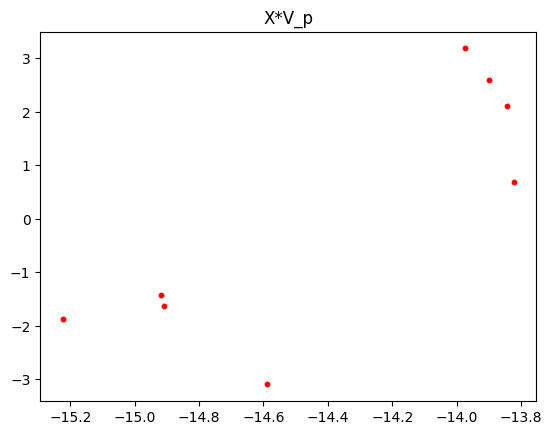

1 s=[43.25241679  5.80928818  5.08158973  4.88012914  4.62482867  4.30469475
  3.6134583   3.16877685  2.81159169  2.21803642]



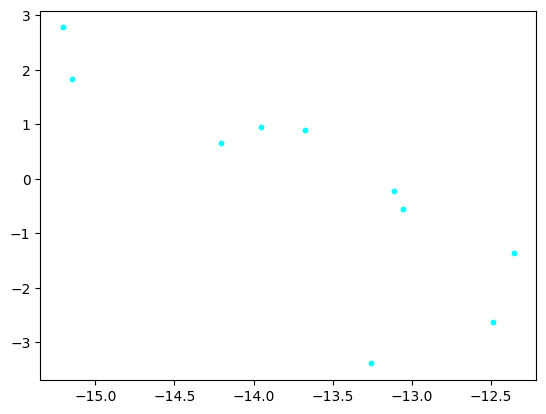

2 s=[41.89323932  6.3161442   5.36725908  4.76978425  4.10060893  3.49642097
  3.40231263  2.80591209  2.23957204]



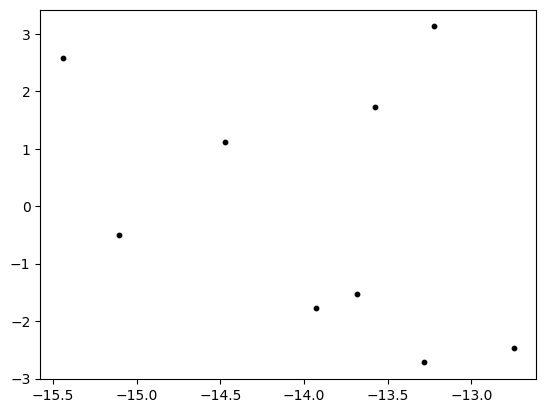

In [3]:
from scipy import linalg

# can see non-linearity in the individual label projections,
# so should consider a  nonlinear dimensionality reduction method.
p=2
clr = {0:'red', 1: 'cyan', 2:'black'}
vps = []
projs = []
plt.title("X*V_p")
for i in range(3):
    indices = y == i
    lmnd = y[indices]
    umnd = X[indices]
    U, s, Vh = linalg.svd(umnd)
    print(f'{i} s={s}\n')
    vp = Vh.T.copy()[:, 0:p]
    projected = np.matmul(umnd, vp)
    plt.scatter(projected[:,0], projected[:,1], s=10, color=clr[i])
    plt.show()
    vps.append(vp)
    projs.append(projected)



In [4]:
'''
p=2
clr = {0:'red', 1: 'cyan', 2:'black'}
vps = []
projs = []
# TODO: for this to be a useful look at the data, need to perform standardization (zer0-center, div by stdev)
# and could further separate by columns.
plt.title("U_p.T * X") 
for i in range(3):
    indices = y == i
    lmnd = y[indices]
    umnd = X[indices]
    U, s, Vh = linalg.svd(umnd)
    print(f'{i} s={s}\n')
    up = U.copy()[:, 0:p]
    # n x 2:
    projected = (np.matmul(up.T, umnd)).T
    plt.scatter(projected[:,0], projected[:,1], s=10, color=clr[i])
    plt.show()
    vps.append(vp)
    projs.append(projected)
'''

'\np=2\nclr = {0:\'red\', 1: \'cyan\', 2:\'black\'}\nvps = []\nprojs = []\n# TODO: for this to be a useful look at the data, need to perform standardization (zer0-center, div by stdev)\n# and could further separate by columns.\nplt.title("U_p.T * X") \nfor i in range(3):\n    indices = y == i\n    lmnd = y[indices]\n    umnd = X[indices]\n    U, s, Vh = linalg.svd(umnd)\n    print(f\'{i} s={s}\n\')\n    up = U.copy()[:, 0:p]\n    # n x 2:\n    projected = (np.matmul(up.T, umnd)).T\n    plt.scatter(projected[:,0], projected[:,1], s=10, color=clr[i])\n    plt.show()\n    vps.append(vp)\n    projs.append(projected)\n'

## A look at SVD based projection of data, reduced to 2 dimensions

s=[72.13455958  9.46386207  7.72091041  6.75346809  6.47903299  6.01602643
  5.55968427  5.37546843  4.95311595  4.86989157  3.94966496  3.81784701
  3.66035581  3.54406066  3.25177668  3.05968404  2.86141846  2.60421373
  2.52336053  2.24686865  2.09645093  2.02801034  1.63697713  1.45533736
  1.39472266  1.12843462  0.78338147]



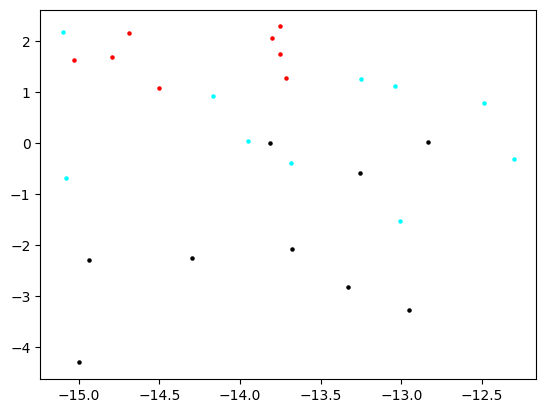

In [5]:
# the variance in the first singular value is very large compared to the remaining,
# but the projection does not show clear segmentation

U, s, Vh = linalg.svd(X)
print(f's={s}\n')
'''s=[72.13455958  9.46386207  7.72091041  6.75346809  6.47903299  6.01602643
  5.55968427  5.37546843  4.95311595  4.86989157  3.94966496  3.81784701
  3.66035581  3.54406066  3.25177668  3.05968404  2.86141846  2.60421373
  2.52336053  2.24686865  2.09645093  2.02801034  1.63697713  1.45533736
  1.39472266  1.12843462  0.78338147]'''

vp = Vh.T.copy()[:, 0:p]
projected = np.matmul(X, vp)
for i in range(3):
    indices = y == i
    xp = projected[:,0]
    xp = xp[indices]
    yp = projected[:,1]
    yp = yp[indices]
    plt.scatter(xp, yp, s=5, color=clr[i])

plt.show()


To use CatBoost or LightGBM below, we split the data into train and test.
If we had enough data we would split it into train, dev, and test.

For such a small dataset, we use 80% train, 20% test.
We have 3 labels, so we choose 80% from each for train, and the rest for test.


In [6]:
_X = X0 # X0, y0 replaced missing values with None, which CatBoost handles
_y = y0

print(f'X.shape={_X.shape}, y.shape={_y.shape}\n')

# drawing k number of (train, test) datasets randomly.  k sub-sampling cross-validation
k_sampling = 10
x_train_dict = {}
x_test_dict = {}
y_train_dict = {}
y_test_dict = {}

for k in range(k_sampling):
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    for i in range(3):
        indices = _y == i
        xp = _X[indices]
        tr_indices = np.random.choice(xp.shape[0], int(xp.shape[0] * 0.8), replace=False)
        te_indices = np.array(list(set([i for i in range(len(xp))]) - set(tr_indices)))
        x_train.extend(xp[tr_indices].tolist())
        x_test.extend(xp[te_indices].tolist())
        for _ in range(xp[tr_indices].shape[0]):
            y_train.append(i)
        for _ in range(xp[te_indices].shape[0]):
            y_test.append(i)
    x_train_dict[k] = np.array(x_train)
    x_test_dict[k] = np.array(x_test)
    y_train_dict[k] = np.array(y_train)
    y_test_dict[k] = np.array(y_test)
    print(f'{k}) x_train.shape={x_train_dict[k].shape}, y_train.shape={y_train_dict[k].shape}')
    print(f'{k}) x_test.shape={x_test_dict[k].shape}, y_test.shape={y_test_dict[k].shape}')

print(f'done splitting into train and test\n')

X.shape=(32, 56), y.shape=(32,)

0) x_train.shape=(25, 56), y_train.shape=(25,)
0) x_test.shape=(7, 56), y_test.shape=(7,)
1) x_train.shape=(25, 56), y_train.shape=(25,)
1) x_test.shape=(7, 56), y_test.shape=(7,)
2) x_train.shape=(25, 56), y_train.shape=(25,)
2) x_test.shape=(7, 56), y_test.shape=(7,)
3) x_train.shape=(25, 56), y_train.shape=(25,)
3) x_test.shape=(7, 56), y_test.shape=(7,)
4) x_train.shape=(25, 56), y_train.shape=(25,)
4) x_test.shape=(7, 56), y_test.shape=(7,)
5) x_train.shape=(25, 56), y_train.shape=(25,)
5) x_test.shape=(7, 56), y_test.shape=(7,)
6) x_train.shape=(25, 56), y_train.shape=(25,)
6) x_test.shape=(7, 56), y_test.shape=(7,)
7) x_train.shape=(25, 56), y_train.shape=(25,)
7) x_test.shape=(7, 56), y_test.shape=(7,)
8) x_train.shape=(25, 56), y_train.shape=(25,)
8) x_test.shape=(7, 56), y_test.shape=(7,)
9) x_train.shape=(25, 56), y_train.shape=(25,)
9) x_test.shape=(7, 56), y_test.shape=(7,)
done splitting into train and test



## A look at LocallyLinearEmbedding

X_transformed.shape=(27, 2)



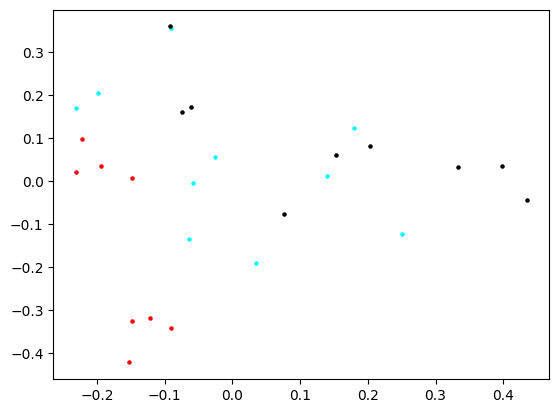

In [7]:
from sklearn.manifold import LocallyLinearEmbedding

p = 2
lle = LocallyLinearEmbedding(n_components=p)
X_transformed = lle.fit_transform(X, y)
print(f'X_transformed.shape={X_transformed.shape}\n')

#lle.get_feature_names_out()
#lle.get_params()

#plt.scatter(X_transformed[:,0], X_transformed[:,1], s=5, color=clr[i])   
#plt.show()

# show the different labels as different colors
for i in range(3):
    indices = y == i
    xp = X_transformed[:,0]
    xp = xp[indices]
    yp = X_transformed[:,1]
    yp = yp[indices]
    plt.scatter(xp, yp, s=5, marker='o', color=clr[i])

plt.show()

## A look at T-SNE

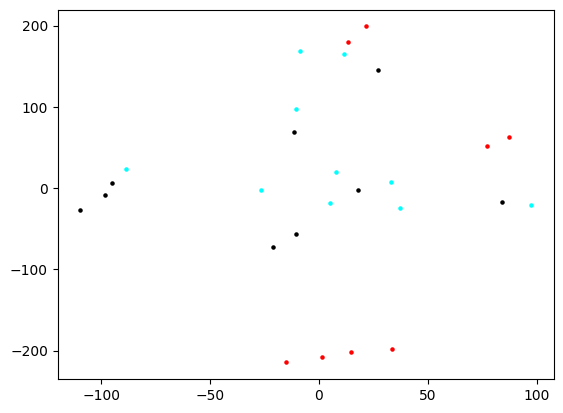

In [8]:
from sklearn.manifold import TSNE

#init='random'
X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', 
                  method='exact', perplexity=2).fit_transform(X)
X_embedded.shape

for i in range(3):
    indices = y == i
    xp = X_embedded[:,0]
    xp = xp[indices]
    yp = X_embedded[:,1]
    yp = yp[indices]
    plt.scatter(xp, yp, s=5, marker='o', color=clr[i])

plt.show()

## A look at supervised learning with CatBoost

Helpful in using CatBoost and Shap was this tutorial ["CatBoost regression in 6 minutes" by Simon Thiesen](https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329)

CatBoost is a gradient boosting machine learning library to solve for categorical features
using oblivious decision trees.  It can handle numerical, categorical, and text feature data.

A few notes about Boosting and ensemble methods from 
Kevin Murphy's 1st book "Probalistic Machine Learning: An Introduction" and from Stanford CS 229 Machine Learning lecture notes.

Ensemble learning is averaging multiple models to reduce the bias and/or variance.
For binary classification, majority vote is often used instead of averaging.
Note that weighted averaging is called "Stacking".

Ensemble learning combine a set of weak learner to create a strong learner that obtains better performance than a single one.

Definitions of weak and strong learners:
   * Weak learners 
       a.k.a. Weak Classifiers: 
       a classifier that achieves slightly better than 50 percent accuracy.
       these are models that perform slightly better than random guessing.
   * Strong learners: 
       models that have arbitrarily good accuracy.

There are many ways to ensemble models in machine learning, 
such as Bagging, Boosting, and Stacking.

Boosting decreases bias, not variance.
Boosting is more suitable for data with low variance, high bias, and high
noise, as it can reduce underfitting and increase accuracy.

As an aside, the subnetwork referred to as a "Residual Block" is an example used in 
Stacking.

Also as an aside, Bagging (Bootstrap Aggregation) is a method of merging the same type of predictions.
Bagging decreases variance, not bias, and solves over-fitting issues in a
model.   The RandomForest method is an example of Bagging.

More regarding CatBoost from [dataaspirant](https://dataaspirant.com/catboost-algorithm/)
and [towardsdatascience](https://towardsdatascience.com/introduction-to-gradient-boosting-on-decision-trees-with-catboost-d511a9ccbd14):

The boosting tree features used in a split are chosen to maximize the split score accuracy which 
includes a penalty function.
The boosting trees are oblivious and balanced trees wherein the same split criterion 
is used across a level.  The feature-split pair chooses a leaf and this is repeated until
the leaves reach the tree depth.

And from [Bard](https://bard.google.com) when asked to summarize leaf growth in CatBoost:

Leaf growth in CatBoost: A summary

Leaf growth in CatBoost refers to the process of building the decision tree at the heart of the model. Here's a breakdown of the key points:

Tree growing methods:

* SymmetricTree: Default approach, builds levels sequentially with fixed splits for all leaves. Fast and often effective, but less flexible than other options.
* Depthwise: Expands by splitting non-terminal leaves with the best loss improvement. More adaptable but not as fast as SymmetricTree.
* Lossguide: Grows leaf by leaf, choosing the non-terminal with the highest gain. Most flexible but not supported for certain analysis methods.

Splitting criteria:

* Minimizes a penalized loss function like cross-entropy or MAE. Penalty terms like L2 regularization prevent overfitting.
* Best split is chosen based on the improvement it brings to the overall loss.

Leaf size limitations:

* min_data_in_leaf: Minimum number of samples allowed in a leaf, controls complexity and prevents noise impact.
* max_leaves: Sets the maximum number of leaves in the tree, another way to control model complexity.

Additional factors:

* Bootstrap aggregation (bagging): Ensembles multiple trees (built on different subsets of data) for better accuracy and robustness.
* Tree depth: Deeper trees can capture more complex relationships but risk overfitting.

Understanding leaf growth is crucial for:

* Tuning CatBoost parameters effectively.
* Interpreting the decision tree's structure and decision rules.
Analyzing model complexity and preventing overfitting.

Further resources:

CatBoost documentation on tree growing policies: https://catboost.ai/docs/concepts/parameter-tuning
Parameter tuning guide: https://catboost.ai/docs/concepts/parameter-tuning
Understanding the CatBoost algorithm: https://medium.com/@harshitaaswani2002/practical-applications-of-catboost-in-data-science-a99f6ff12d00


In [9]:
from catboost import CatBoostClassifier, Pool
import shap

# there are 56 features
#nd = int(np.sqrt(x_train.shape[1]))

cat_features = [0,1,2] #this is needed when they're categorical, e.g. ['a','b','c']
loss_f = 'MultiClass'
#loss_f = 'logloss' #default
#l2_leaf_reg = 8 #default is 3
#depth=6 #default

# running with these params, depth of tree was only 2 or 8
'''
grid_params = {'learning_rate': [0.03, 0.1],
            'depth': [2, 4, 6, 8],
            'l2_leaf_reg': [0.2, 0.5, 1, 3]}
'''
grid_params = {'learning_rate': [0.03, 0.1],
            'depth': [2, 8],
            'l2_leaf_reg': [0.2, 0.5, 1, 3]}

classifier_params = []
models = {}
for k in range(k_sampling):
    x_train = x_train_dict[k]
    y_train = y_train_dict[k]
    assert(x_train.shape[0] == y_train.shape[0])
    model = CatBoostClassifier(loss_function=loss_f, verbose=True, metric_period=499, classes_count=3)
    #bootstrap_type='Regularization'
    # helpful: https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329 
    ## turned off verbose and plot to reduce use of browser memory.  reenable if running from CLI, but capture output
    model.grid_search(grid_params, x_train, y_train, plot=False)
    print(f'sorted_feature_importance={model.feature_importances_.argsort()}\n')
    print(f'{k}) trained model params={model.get_params()}')
    classifier_params.append((model.get_params()))
    models[k] = model

print(f'done training CatBoostClassifier\n')


0:	learn: 1.0886989	test: 1.1064356	best: 1.1064356 (0)	total: 58.1ms	remaining: 58s
499:	learn: 0.0335313	test: 1.3834403	best: 1.1064356 (0)	total: 303ms	remaining: 303ms
998:	learn: 0.0086430	test: 1.5796692	best: 1.1064356 (0)	total: 516ms	remaining: 516us
999:	learn: 0.0086214	test: 1.5792291	best: 1.1064356 (0)	total: 517ms	remaining: 0us

bestTest = 1.106435569
bestIteration = 0

0:	loss: 1.1064356	best: 1.1064356 (0)	total: 867ms	remaining: 13s
0:	learn: 1.0665647	test: 1.1253270	best: 1.1253270 (0)	total: 567us	remaining: 567ms
499:	learn: 0.0037122	test: 1.5997645	best: 1.1253270 (0)	total: 184ms	remaining: 184ms
998:	learn: 0.0014780	test: 1.7524629	best: 1.1253270 (0)	total: 375ms	remaining: 375us
999:	learn: 0.0014754	test: 1.7524376	best: 1.1253270 (0)	total: 376ms	remaining: 0us

bestTest = 1.125327033
bestIteration = 0

1:	loss: 1.1253270	best: 1.1064356 (0)	total: 1.26s	remaining: 8.82s
0:	learn: 1.0903100	test: 1.1060709	best: 1.1060709 (0)	total: 1.15ms	remaining: 1.

true=0, predicted=[0],  prob=[0.56828592 0.34578865 0.08592543]
true=0, predicted=[0],  prob=[0.58998463 0.29600194 0.11401343]
true=1, predicted=[0],  prob=[0.5416697  0.30598596 0.15234433]
true=1, predicted=[0],  prob=[0.60301323 0.26632552 0.13066126]
true=1, predicted=[0],  prob=[0.38447588 0.34814899 0.26737513]
true=2, predicted=[2],  prob=[0.06903809 0.12332278 0.80763913]
true=2, predicted=[1],  prob=[0.05602819 0.62790266 0.31606914]
0) R2: 0.00, RMSE: 0.76
true=0, predicted=[0],  prob=[0.98293197 0.01196817 0.00509987]
true=0, predicted=[1],  prob=[0.30837746 0.65729933 0.03432321]
true=1, predicted=[1],  prob=[0.02613974 0.97075881 0.00310145]
true=1, predicted=[2],  prob=[0.02434654 0.2330742  0.74257926]
true=1, predicted=[1],  prob=[0.14625176 0.52869452 0.32505371]
true=2, predicted=[2],  prob=[0.05143612 0.0901812  0.85838268]
true=2, predicted=[2],  prob=[0.01091381 0.22345369 0.7656325 ]
1) R2: 0.50, RMSE: 0.53
true=0, predicted=[1],  prob=[0.02394996 0.93368441 0.04

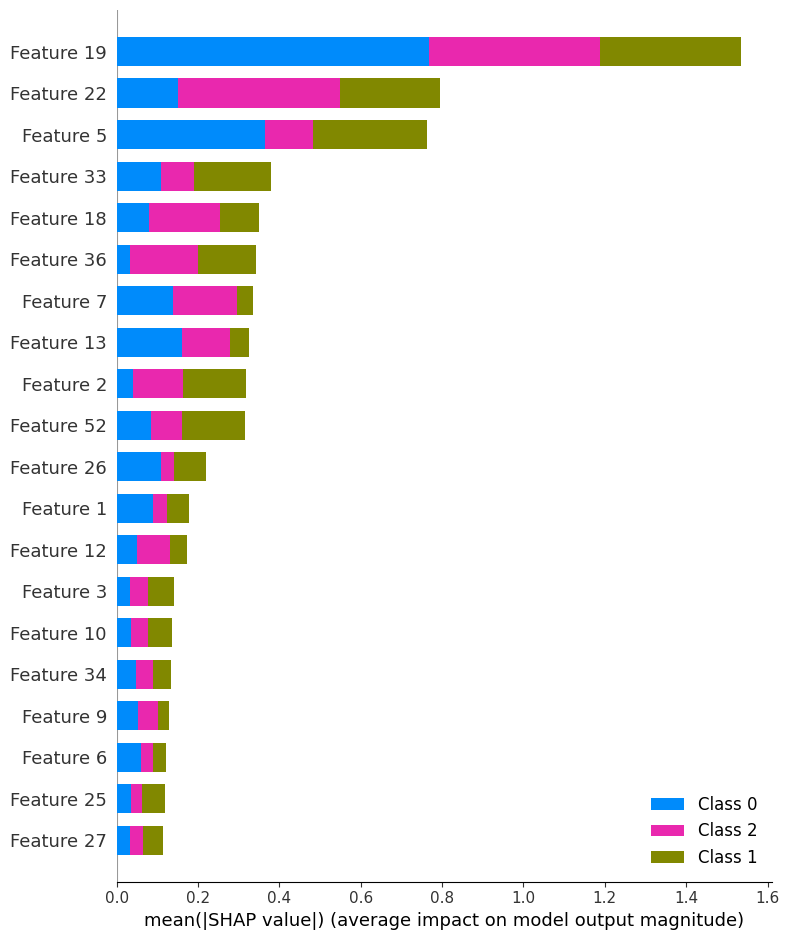

model 8 r2=2, rmse=0.5345224838248488
    params={'loss_function': 'MultiClass', 'verbose': True, 'metric_period': 499, 'classes_count': 3, 'depth': 8, 'l2_leaf_reg': 3, 'learning_rate': 0.03}



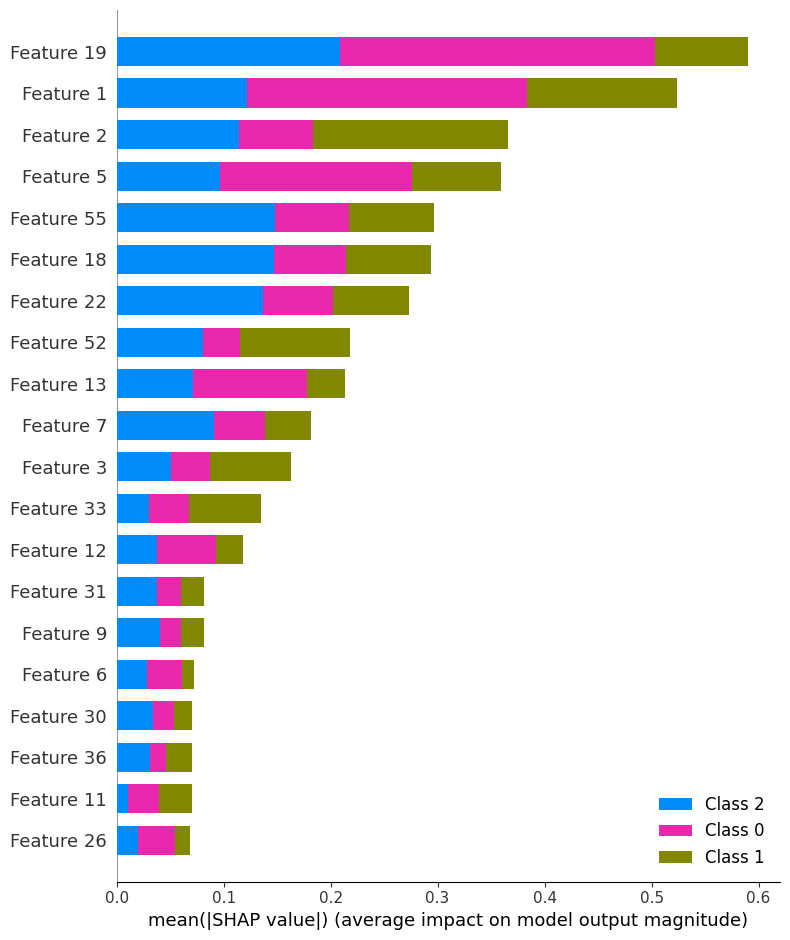

model 7 r2=2, rmse=0.5345224838248488
    params={'loss_function': 'MultiClass', 'verbose': True, 'metric_period': 499, 'classes_count': 3, 'depth': 2, 'l2_leaf_reg': 3, 'learning_rate': 0.1}



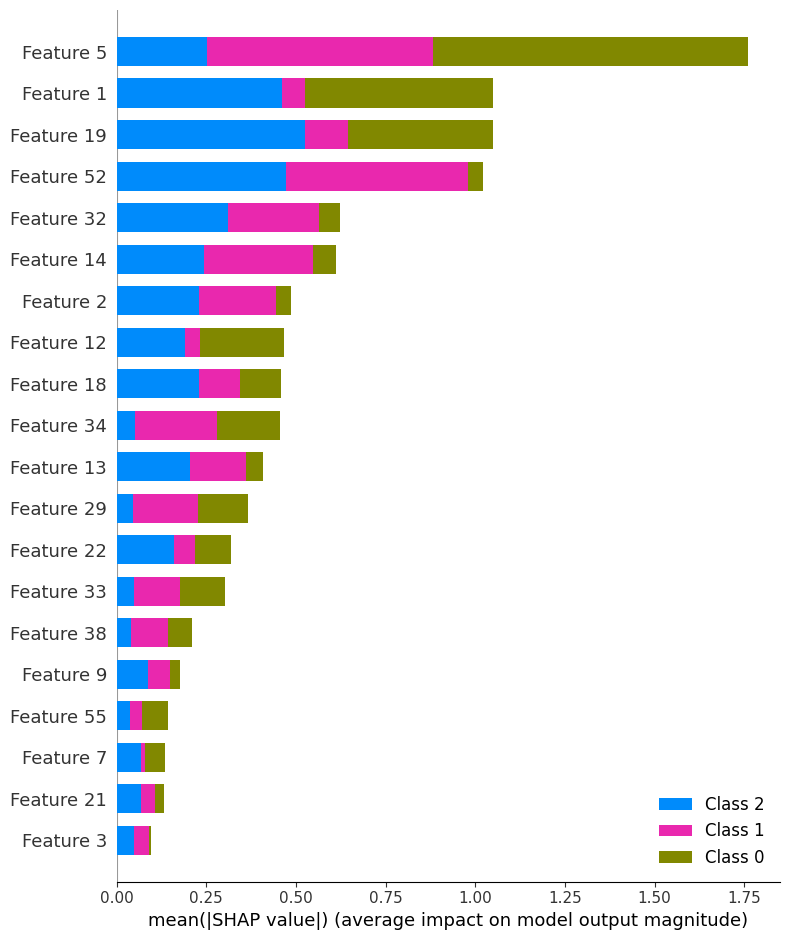

model 6 r2=2, rmse=0.5345224838248488
    params={'loss_function': 'MultiClass', 'verbose': True, 'metric_period': 499, 'classes_count': 3, 'depth': 2, 'learning_rate': 0.1, 'l2_leaf_reg': 0.2}



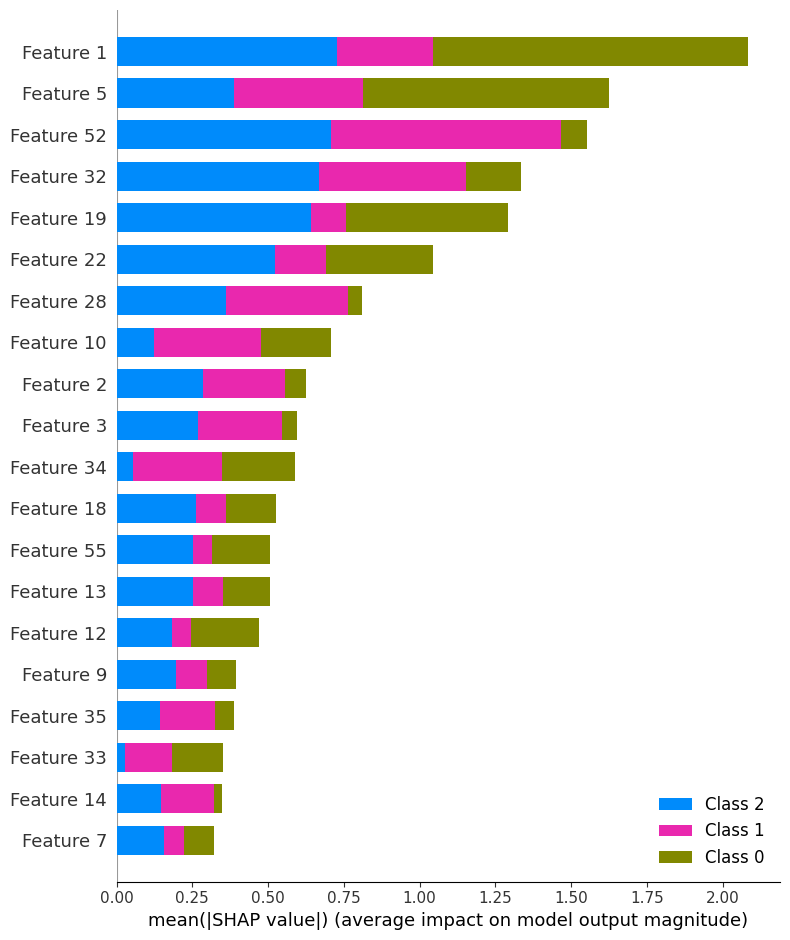

model 5 r2=2, rmse=0.6546536707079771
    params={'loss_function': 'MultiClass', 'verbose': True, 'metric_period': 499, 'classes_count': 3, 'depth': 2, 'l2_leaf_reg': 3, 'learning_rate': 0.1}



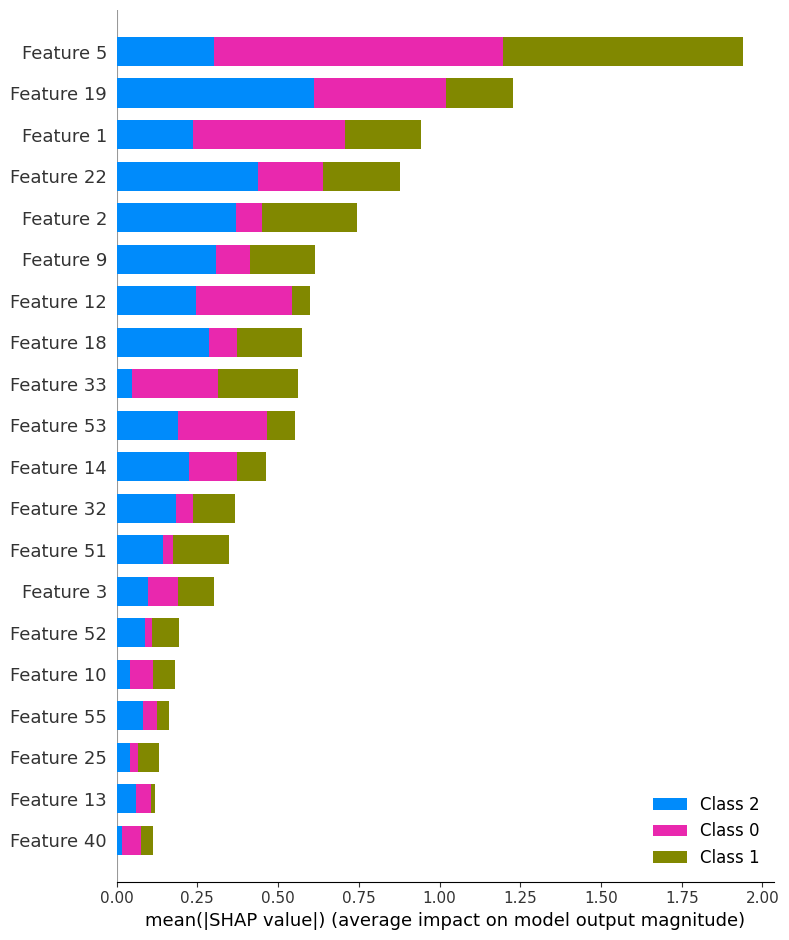

model 4 r2=2, rmse=0.5345224838248488
    params={'loss_function': 'MultiClass', 'verbose': True, 'metric_period': 499, 'classes_count': 3, 'depth': 2, 'learning_rate': 0.03, 'l2_leaf_reg': 0.2}



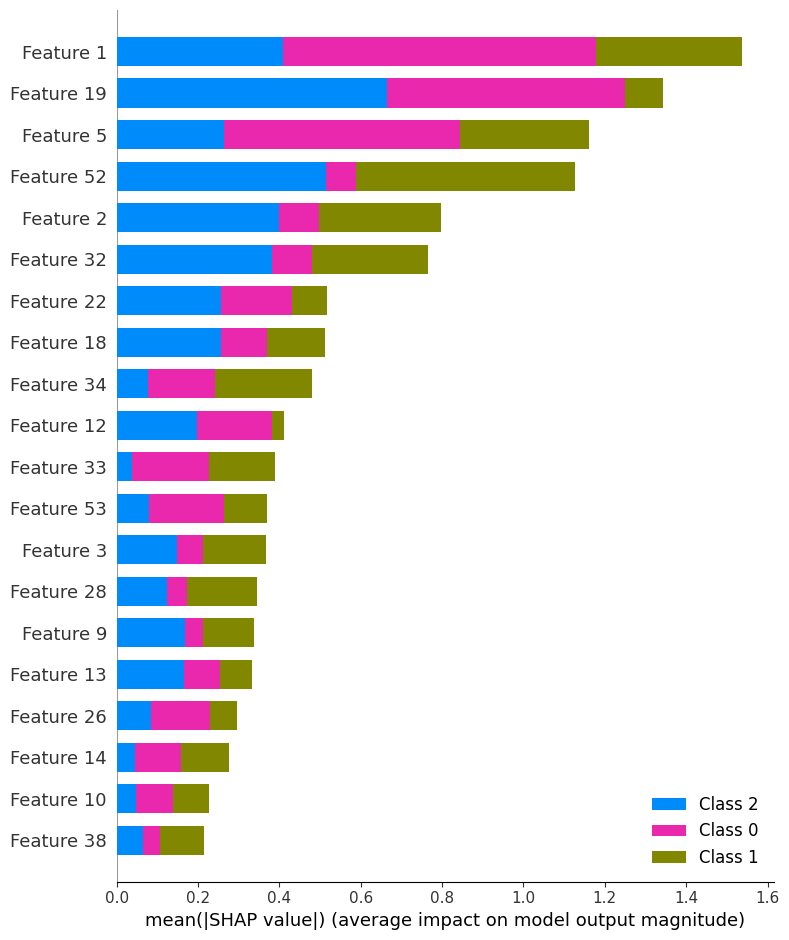

model 3 r2=2, rmse=0.5345224838248488
    params={'loss_function': 'MultiClass', 'verbose': True, 'metric_period': 499, 'classes_count': 3, 'depth': 2, 'learning_rate': 0.1, 'l2_leaf_reg': 0.2}



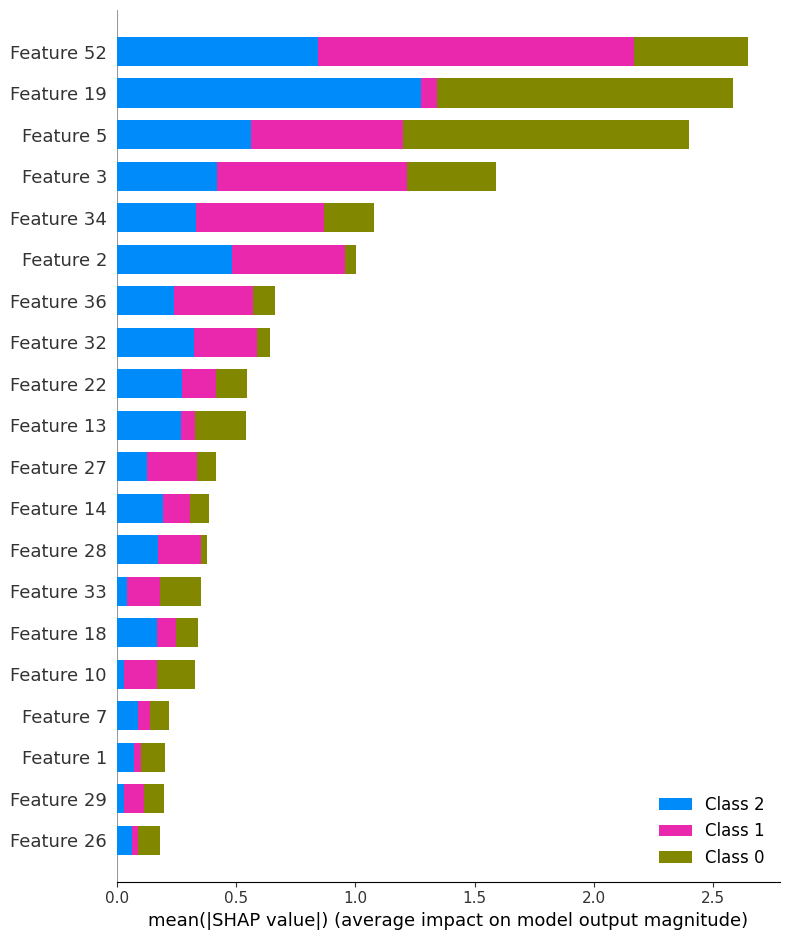

model 2 r2=2, rmse=0.7559289460184544
    params={'loss_function': 'MultiClass', 'verbose': True, 'metric_period': 499, 'classes_count': 3, 'depth': 8, 'learning_rate': 0.1, 'l2_leaf_reg': 0.5}



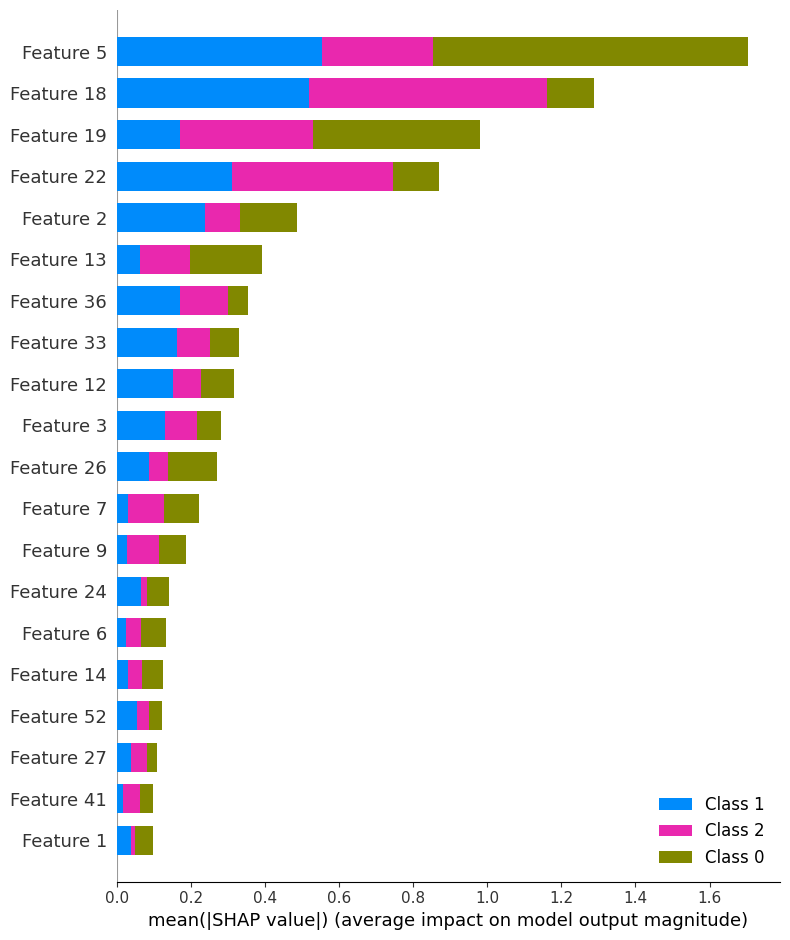

model 1 r2=2, rmse=0.5345224838248488
    params={'loss_function': 'MultiClass', 'verbose': True, 'metric_period': 499, 'classes_count': 3, 'depth': 2, 'l2_leaf_reg': 3, 'learning_rate': 0.1}



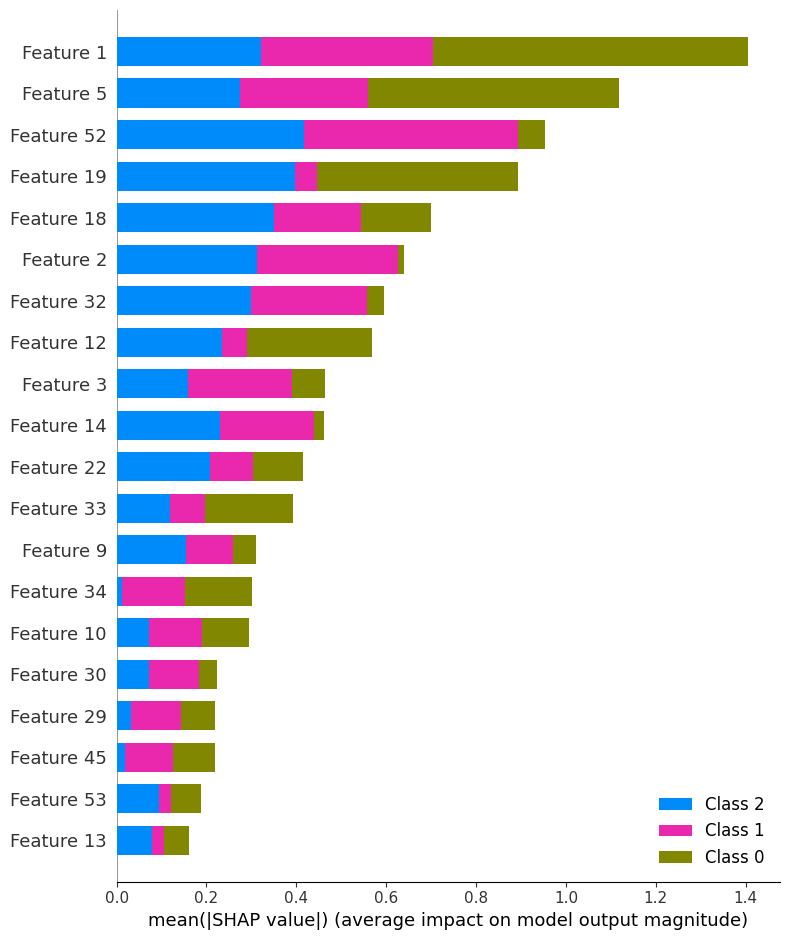

model 0 r2=2, rmse=0.7559289460184544
    params={'loss_function': 'MultiClass', 'verbose': True, 'metric_period': 499, 'classes_count': 3, 'depth': 8, 'l2_leaf_reg': 3, 'learning_rate': 0.1}



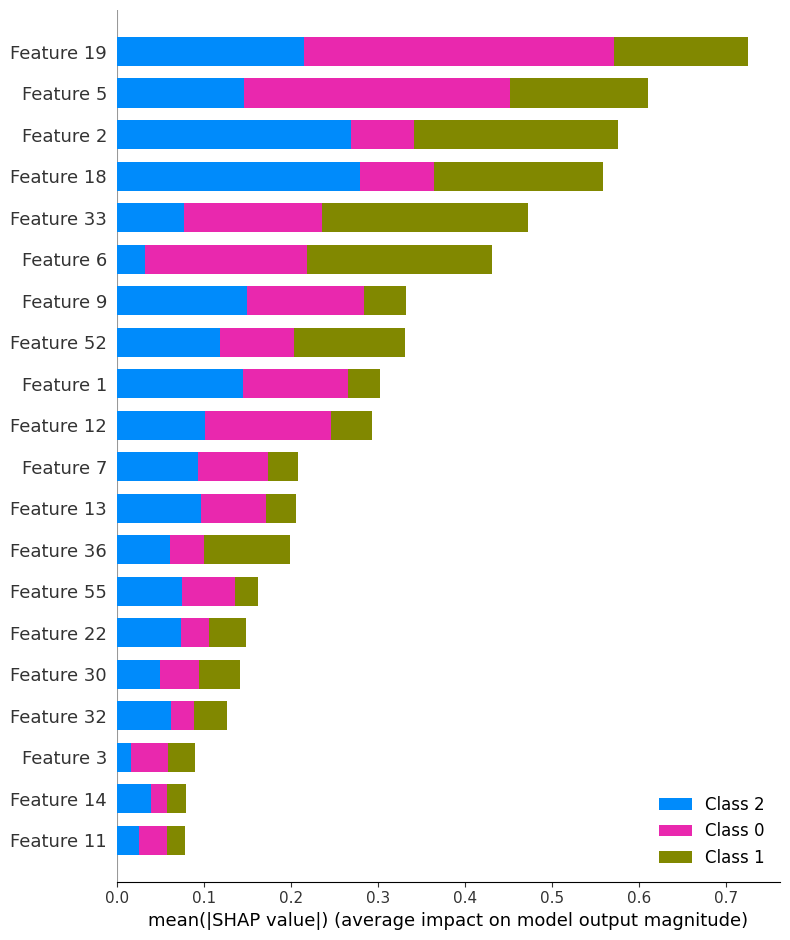

In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

classifier_rmses = []
classifier_r2s = []

for k in range(k_sampling):
    model = models[k]
    x_test = x_test_dict[k]
    y_test = y_test_dict[k]
    y_pred_test = model.predict(x_test)
    y_proba_test = model.predict_proba(x_test)
    assert(len(y_pred_test) == len(y_test))
    for i in range(len(y_test)):
        print(f'true={y_test[i]}, predicted={y_pred_test[i]},  prob={y_proba_test[i]}')
    
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
    r2 = r2_score(y_test, y_pred_test)
    print(f'{k}) R2: {r2:.2f}, RMSE: {rmse:.2f}')
    classifier_r2s.append(2)
    classifier_rmses.append(rmse)

# this from Google generative AI:
print(f'Substantial, moderate and weak R^2 scores respectively are 0.75, 0.50, and 0.25\n')

print(f'Summary of models with R2 >= 0.5:')
indices = np.array(classifier_r2s).argsort()
n = len(indices)
for i in range(n-1, -1, -1):
    k = indices[i]
    r2 = classifier_r2s[k]
    if r2 < 0.5:
        break
    print(f'model {k} r2={r2}, rmse={classifier_rmses[k]}\n    params={classifier_params[k]}\n')
    x_test = x_test_dict[k]
    y_test = y_test_dict[k]
    model = models[k]
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, x_test)
    shap.summary_plot(shap_values, x_test, plot_type='bar')

# can save the best model using model.save_model(...)


### Extracting the shap feature importance

In [41]:
#TODO: read in more detail: https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

# extract the importance from the top r2 model
#  TODO: look at extractign other than mean(0)
k = indices[len(indices)-1]
x_test = x_test_dict[k]
y_test = y_test_dict[k]
model = models[k]
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

t = np.argsort(np.abs(shap_values).mean(0))
t = np.flip(t, axis=1)
#print(t)
nt = len(t)
nf = len(t[0])
nfm1 = nf - 1.
weights=[0 for i in range(nf)]
for i in range(nt):
    for j in range(nf):
        weights[t[i][j]] += (nfm1 - j)/nfm1
weights = np.array(weights)/nt
fi = np.flip(np.argsort(weights))
fw = np.take(weights, fi)
print(f'feature  weight ')
for i in range(len(fi)):
    print(f'{fi[i]:7d} {fw[i]:7.3f}')


feature  weight 
     19   0.997
      5   0.969
     22   0.966
      7   0.901
     33   0.896
     18   0.883
     13   0.868
     36   0.868
     52   0.847
      2   0.842
     26   0.790
      1   0.748
     12   0.748
     10   0.699
     34   0.696
      9   0.683
      6   0.657
      3   0.647
     32   0.629
     25   0.587
     27   0.582
     29   0.540
     31   0.535
     41   0.519
     14   0.509
     53   0.504
     30   0.499
     50   0.496
     55   0.491
     35   0.483
     39   0.462
     45   0.449
     11   0.442
     38   0.439
     51   0.426
     28   0.426
     54   0.416
     37   0.410
     40   0.356
     24   0.356
      8   0.348
     23   0.338
     42   0.309
     43   0.273
      4   0.226
     17   0.216
     21   0.197
     49   0.161
     44   0.158
     48   0.153
     16   0.101
     47   0.094
     20   0.078
     15   0.060
     46   0.018
      0   0.010


## CatBoostRegressor

In [ ]:
# CatBoostRegressor results were not better than CatBoostClassifier for this task,
'''
from catboost import CatBoostRegressor

# configure for multinomial logistic regression, aka mulyinomial logit

#loss function choices:
# |      'RMSE' <-- default
# |      'MAE'  <-- Mean Absolute  Error
# |      'Quantile:alpha=value'
# |      'LogLinQuantile:alpha=value'
# |      'Poisson'
# |      'MAPE'   <-- Mean Absolute Percentage Error
# |      'Lq:q=value'
# |      'SurvivalAft:dist=value;scale=value'

#loss_f = 'RMSE'
loss_f = 'MultiRMSE'

#nd = int(x_train.shape[1]/3)
grid_params = {'learning_rate': [0.03, 0.1],
            'depth': [2, 3, 4, 6],
            'l2_leaf_reg': [0.01, 0.1, 1, 3, 6]}
models = {}
regressor_params = []
for k in range(k_sampling):
    x_train = x_train_dict[k]
    y_train = y_train_dict[k]
    model = CatBoostRegressor(loss_function=loss_f, metric_period=100, verbose=True)
    model.grid_search(grid_params, x_train, y_train, verbose=True, plot=True)
    models[k] = model
    print(f'sorted_feature_importance={model.feature_importances_.argsort()}\n')
    print(f'trained model params={model.get_params()}')
    regressor_params.append((model.get_params()))

print(f'done training CatBoostRegressor\n')
'''

In [ ]:
'''
prediction_type='RawFormulaVal' #default
prediction_type='Probability'
regressor_stats = []
for k in range(k_sampling):
    model = models[k]
    x_test = x_test_dict[k]
    y_test = y_test_dict[k]
    y_pred_test = model.predict(x_test, prediction_type='RawFormulaVal')
    y_proba_test = model.predict(x_test, prediction_type='Probability')
    assert(len(y_pred_test) == len(y_test))
    y_pred = y_pred_test.round().astype(dtype='int32').copy()
    for i in range(len(y_test)):
        print(f'true={y_test[i]}, predicted={y_pred[i]} from {y_pred_test[i]},  prob={y_proba_test[i]}')
    
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
    r2 = r2_score(y_test, y_pred_test)
    print(f'{k}) RMSE: {rmse:.2f}')
    print(f'{k}) R2: {r2:.2f}')
    regressor_stats.append({'r2':f'{r2:.2f}', 'rmse':f'{rmse:.2f}'})
    # this from Google generative AI:
    print(f'substantial, moderate and weak R^2 scores respectively are 0.75, 0.50, and 0.25\n')

print(f'done with prediction on test dataset using CatBoostRegressor\n')
'''

In [ ]:
#print(f'classifier_stats={classifier_stats}\n')
#print(f'classifier_params={classifier_params}\n')
# print(f'regressor_stats={regressor_stats}')


## XGBoost

In [ ]:
'''
from xgboost import XGBClassifier


objective = "multi:softprob" #"multi:softmax"
model = XBGClassifier(n_estimators=100, max_depth=2, learning_rate=0.1, objective=objective)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
print(preds)

accuracy = model.score(xtest, ytest)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
y_pred_proba = model.predict_proba(xtest)
log_loss(ytest, y_pred_proba)
print(classification_report(ytest, preds))


see
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

#explainer = shap.TreeExplainer(model)
#explainer = shap.explainers
shap_values = explainer.shap_values(xtest)
shap.summary_plot(shap_values, xtest)
'''

## lightGBM

In [ ]:
'''
from lightgbm import LGBMClassifier
model = LGBMClassifier(learning_rate=0.1, n_estimators=100, num_leaves=)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
'''